# Introducción al aprendizaje automático

###  Laboratorio 2: Armado de un esquema de aprendizaje automático
#### Grupo 30: Artola, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Carga del conjunto de datos](#datos)
* [Carga de datos , división y evaluación](#division)
* [Ejercicio 1:Descripción de los datos y tareas](#descripcion)
* [Ejercicio 2: Predicción con modelos lineales](#prediccion)
   * [Ejercicio 2.1:SGDClassifier con hiperparámetros por defecto](#classifier)
   * [Ejercicio 2.2:Ajuste de hiperparámetros](#ajuste)
* [Ejercicio 3: Arbol de decisión](#arbol)
   * [Ejercicio 3.1:DecisionTreeClassifier con hiperparámetros por defecto](#arbol1)
   * [Ejercicio 3.2: Ajuste de hiperparámetros](#arbol2)
   


### Librerías externas <a class="anchor" id="Libs"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

### Carga del conjunto de datos <a class="anchor" id="datos"></a>

In [2]:
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset = pd.read_csv(r"C:\Users\Usuario\Desktop\Roco\DIPLOMATURA FAMAF\loan_data.csv",comment="#")


### Ejercicio 1: Descripción de los datos y tarea<a class="anchor" id="descripcion"></a>
---

**No hace falta escribir código para responder estas preguntas.**

#### 1. ¿De qué se trata el conjunto de datos?


* Descripción general de las columnas de nuestro dataset

El departamento de créditos de un banco quiere automatizar la toma de decisiones para el proceso de aprobación de líneas de crédito con garantía hipotecaria. El modelo se basará en los datos recopilados de los solicitantes recientes a los que se les otorgó crédito a través del proceso actual de suscripción de préstamos. 
* Descripción Específica:
Los datos del dataset contienen información sobre créditos hipotecarios que se les otorgó a ciertas personas, junto con su historial crediticio.


#### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

* Consideramos que la  variable objetivo es  TARGET,que hace referencia a si el cliente pagó o no el préstamos en el periodo determinado.
* Label: 1 = client defaulted on loan.Cliente incumplió con el préstamo.
* Label 0 = loan repaid.Préstamo reembolsado.

#### 3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Atributos:

* TARGET= 
 * Label: 1 = client defaulted on loan.Cliente incumplió con el préstamo.
 * Label 0 = loan repaid.Préstamo reembolsado.
* LOAN = Amount of the loan request.Importe de la solicitud de préstamo.
* MORTDUE= Amount due on existing mortgage.Monto adeudado sobre la hipoteca existente.
* VALUE= Value of current property.Valor de la propiedad actual.
* YOJ= Years at present job.Años en el trabajo actual.
* DEROG= Number of major derogatory reports.Número de informes derogados importantes.
* DELINQ= Number of delinquent credit lines.Número de líneas de crédito morosas.
* CLAGE= Age of oldest trade line in months..Antigüedad de la línea comercial más antigua en meses.
* NINQ= Number of recent credit lines.Número de líneas de crédito recientes.
* CLNO= Number of credit lines.Número de líneas de crédito.
* DEBTINC= Debt-to-income ratio.Relación deuda-ingresos.

#### 4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Consideramos que los atributos determinantes para la predicción son:

* DEBTINC=Relación Deuda-Ingresos
* DELINQ=Número de lineas de crédito morosas
* DEROG= Número de informes derogados importantes
* NINQ=Número de lineas de crédito morosas


### Carga de datos , división y evaluación<a class="anchor" id="division"></a>


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Ejercicio 2: Predicción con Modelos Lineales<a class="anchor" id="prediccion"></a>

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [4]:
#Chequeamos información de nuestro dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


De lo anterior:
   * La base de datos posee 1854 filas y 11 columnas
   * No posee Nan

In [5]:
# Número de filas y columnas que conforman nuestro dataset
dataset.shape

(1854, 11)

In [6]:
#Corroboramos que nuestro dataset no tiene valores nulos 
dataset.isnull().sum()

TARGET     0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64



#### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto<a class="anchor" id="classifier"></a>

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

* El Accuracy mide la proporción de las predicciones que realiza el modelo que fueron correctas,este puede tomar valores entre 0 y 100%.
* La precisión mide la proporción de las predicciones positivas hechas por el modelo que son correctas.
* El Recall mide la proporción de casos reales positivos que son predichos como tales.El foco de este indicador está en capturar todos los casos positivos como positivos.
* El F1 Score se crea con el objetivo de contar con un único indicador para optimizar / comparar.Es la Métrica basada en media armónica entre recall y precisión.

La matriz de confusión es un herramienta que permite visualizar el desempeño / calidad de los modelos de machine learning.
Los elementos de una matriz de confusión son:
Columnas: Casos reales según cada clase (valores de la variable dependiente)
Filas: Predicciones del modelo por cada clase.
¿Qué podemos ver entonces en la matriz?
##### y %  de casos reales por clase.
##### y %  de casos predichos por clase.
##### y % de aciertos y errores del modelo.
Veamos cada cuadrante del ejemplo:
* Verdaderos positivos (VP o TP): Acierto del modelo al predecir ocurrencia del evento para casos en que efectivamente ocurre (casos verdaderos predichos como verdaderos).
* Verdaderos negativos (VN o TN): Acierto del modelo al predecir no ocurrencia del evento para casos en que efectivamente no ocurre (casos falsos predichos como falsos).
* Falsos positivos (FP o Error tipo I): Error del modelo al predecir ocurrencia del evento para casos en que no ocurre (casos falsos predichos como positivos).
* Falsos negativos (FN o Error tipo II): Error del modelo al predecir no ocurrencia del evento para casos en que sí ocurre (casos positivos predichos como falsos).
En base a la matriz de confusión definiremos las métricas de evaluación: recall, accuracy, F1-Score, etc.

Se empleo el siguiente  link para información de SGDClassifier

* https://scikit-learn.org/stable/modules/sgd.html#sgd

In [7]:
#En base a la información proporcionada por el link , se importa la libreria de Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state= 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier.fit(X_train, y_train)

SGDClassifier(random_state=100)

Resultados para conjunto de train 

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1232
           1       0.80      0.30      0.43       251

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.84      1483



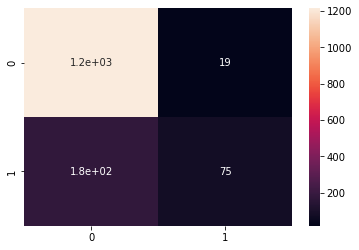

In [8]:
y_pred_train = classifier.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot= True)
print('Resultados para conjunto de train \n')
print(classification_report(y_train, y_pred_train))

Conclusión matriz de confusión para resultados de train 
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 1.2e+03 valores al predecir ocurrencia del evento , en este caso , el pago del préstamo por el cliente , para casos que efectivamente ocurren (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 75 valores al predecir la no ocurrencia del modelo , la falta de pago del prestamos por parte del cliente,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 19 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 1.8e+02 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.

Resultados para conjunto de test 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



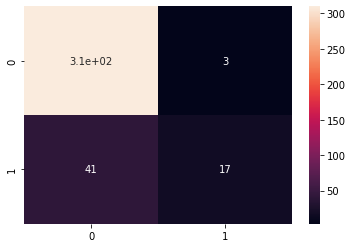

In [9]:
y_pred = classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
print('Resultados para conjunto de test \n')
print(classification_report(y_test, y_pred))

Conclusión matriz de confusión para resultados de test
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 3.1e+02 valores al predecir ocurrencia del evento , en este caso , el pago del préstamo por el cliente , para casos que efectivamente ocurren (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 17 valores al predecir la no ocurrencia del modelo , la falta de pago del prestamos por parte del cliente,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 3 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 41 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.


#### Ejercicio 2.2:  Ajuste de Hiperparámetros<a class="anchor" id="ajuste"></a>
Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html
- https://www.knowledgehut.com/tutorials/machine-learning/hyperparameter-tuning-machine-learning
- https://upscfever.com/upsc-fever/en/programming/python/20c.html

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) nos sirve para hacer validación cruzada sobre una grilla de parámetros. Sklearn se encarga de todo el proceso y nos devuelve una tabla de resultados y el mejor clasificador obtenido.

La búsqueda se puede configurar de varias maneras. Por defecto la validación cruzada es estratificada.

- [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter9)

In [10]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.001, 0.0001, 0.00001],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.75] 
}

cv = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_loss', 'param_alpha', 'param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_loss,param_alpha,param_penalty,param_l1_ratio,mean_test_score,std_test_score,rank_test_score
3,hinge,0.001,elasticnet,0.5,0.869178,0.005933,1
0,hinge,0.001,elasticnet,0.2,0.867829,0.008460,2
6,hinge,0.001,elasticnet,0.75,0.867156,0.003635,3
1,log,0.001,elasticnet,0.2,0.865149,0.016159,4
7,log,0.001,elasticnet,0.75,0.865149,0.014678,4
4,log,0.001,elasticnet,0.5,0.863798,0.012634,6
12,hinge,0.0001,elasticnet,0.5,0.855016,0.010325,7
9,hinge,0.0001,elasticnet,0.2,0.852321,0.010835,8
10,log,0.0001,elasticnet,0.2,0.848988,0.022089,9
19,log,0.00001,elasticnet,0.2,0.848289,0.019018,10


In [11]:
best_model = cv.best_estimator_
best_model

SGDClassifier(alpha=0.001, l1_ratio=0.5, penalty='elasticnet', random_state=100)

In [12]:
cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.5, 'loss': 'hinge', 'penalty': 'elasticnet'}

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1232
           1       0.89      0.24      0.37       251

    accuracy                           0.87      1483
   macro avg       0.88      0.61      0.65      1483
weighted avg       0.87      0.87      0.83      1483



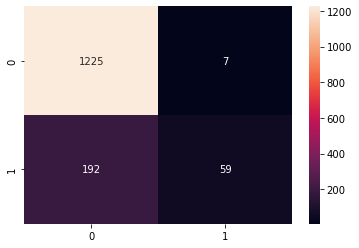

In [13]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

Conclusión matriz de confusión para resultados de train 
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 1225 valores al predecir el pago del préstamo por parte del cliente, cuando en realidad si ocurrio tal evento (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 59 valores al predecir la no ocurrencia del pago por parte del préstamo por parte del cliente ,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 7 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 192 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.


Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



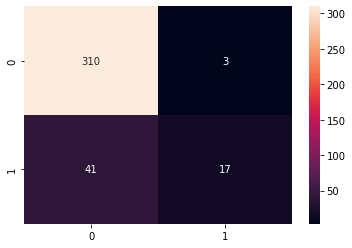

In [14]:
y_pred = cv.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

Conclusión matriz de confusión para resultados de train 
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 310 valores al predecir ocurrencia del evento , en este caso , el pago del préstamo por el cliente , para casos que efectivamente ocurren (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 17 valores al predecir la no ocurrencia del modelo , la falta de pago del prestamos por parte del cliente,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 3 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 41 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.

### Ejercicio 3:  Arbol de decisión<a class="anchor" id="arbol"></a>
En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


#### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto<a class="anchor" id="arbol1"></a>
Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [15]:
from sklearn.tree import DecisionTreeClassifier
#max_depth=2
#Se fija solamente la semilla aleatoria según enunciado
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [16]:
#y_train_pred = clf.predict(X_train)
#y_test_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



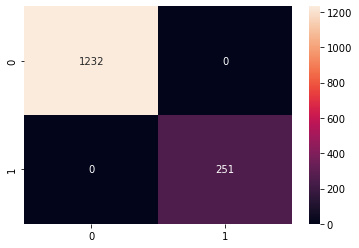

In [17]:
y_pred_train = clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))
#Cuándo vamos modificando el valor de la semilla aleatoria ,los valores de estos parámetros cambian.

Conclusión matriz de confusión para resultados de train 

* Verdaderos Positivos = El modelo muestra 1232 valores al predecir el pago del préstamo por parte del cliente, cuando en realidad si ocurrio tal evento (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 251 valores al predecir la no ocurrencia del pago por parte del préstamo por parte del cliente ,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 0 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 0 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       313
           1       0.72      0.66      0.68        58

    accuracy                           0.91       371
   macro avg       0.83      0.80      0.81       371
weighted avg       0.90      0.91      0.90       371



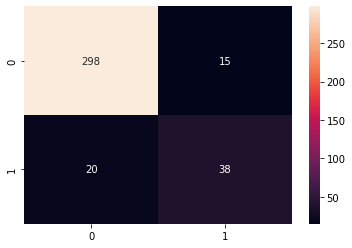

In [18]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

Conclusión matriz de confusión para resultados de test
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 298 valores al predecir el pago del préstamo por parte del cliente, cuando en realidad si ocurrio tal evento (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 38 valores al predecir la no ocurrencia del pago por parte del préstamo por parte del cliente ,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 15 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 20 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.

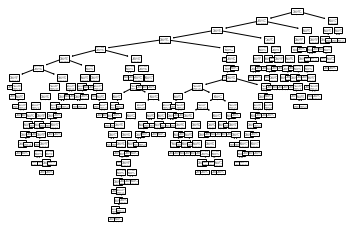

In [19]:
#Inspeccionando el arbol de decisión
from sklearn.tree import plot_tree

plot_tree(clf);

Cuando no defino un max_depth , el arbol de decisión toma una forma no definida como la anterior , es decir , multiples ramas , con lo cuál es dficil obtener una adecuada conclusión , pero si definimos esa variable podemos obtener una forma más óptima

#### Ejercicio 3.2: Ajuste de Hiperparámetros<a class="anchor" id="arbol2"></a>

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [20]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,5,10,15,20],
    'min_samples_leaf': [1, 5, 10, 15,20],
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(X_train, y_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
32,entropy,5,10,0.880647,0.003456,1
11,gini,10,5,0.879991,0.019750,2
10,gini,10,1,0.879991,0.023914,3
7,gini,5,10,0.879302,0.005732,4
22,gini,20,10,0.877955,0.014463,5
17,gini,15,10,0.877955,0.014463,5
8,gini,5,15,0.877289,0.011670,7
12,gini,10,10,0.877282,0.014953,8
30,entropy,5,1,0.875935,0.008521,9
35,entropy,10,1,0.875264,0.010528,10


In [21]:
best_model = cv.best_estimator_
best_model

SGDClassifier(alpha=0.001, l1_ratio=0.5, penalty='elasticnet', random_state=100)

In [22]:
cv_dt.best_params_


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1232
           1       0.94      0.39      0.55       251

    accuracy                           0.89      1483
   macro avg       0.92      0.69      0.75      1483
weighted avg       0.90      0.89      0.87      1483



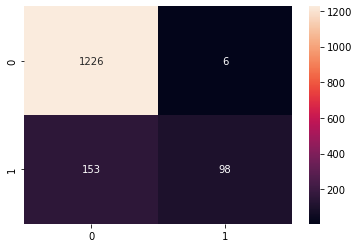

In [23]:
# Conjunto de train
y_pred_train = cv_dt.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

Conclusión matriz de confusión para resultados de train 
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 1226 valores al predecir el pago del préstamo por parte del cliente, cuando en realidad si ocurrio tal evento (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 98 valores al predecir la no ocurrencia del pago por parte del préstamo por parte del cliente ,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 6 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 153 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       313
           1       0.86      0.41      0.56        58

    accuracy                           0.90       371
   macro avg       0.88      0.70      0.75       371
weighted avg       0.89      0.90      0.88       371



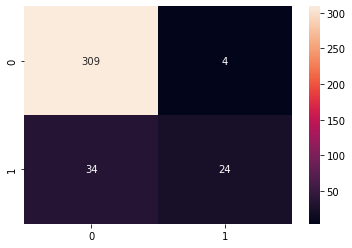

In [24]:
# Conjunto de test
y_pred = cv_dt.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

Conclusión matriz de confusión para resultados de test
Target= Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.
* Verdaderos Positivos = El modelo muestra 309 valores al predecir el pago del préstamo por parte del cliente, cuando en realidad si ocurrio tal evento (Casos verdaderos predichos como verdaderos).
* Verdaderos Negativos = El modelo determina 24 valores al predecir la no ocurrencia del pago por parte del préstamo por parte del cliente ,para casos que efectivamente no ocurren(Casos falsos predichos como falsos).
* Falsos positivos= El modelo determina 4 valores al predecir que ocurre el pago del prestamo por parte del cliente , cuando en realidad no ocurre el pago.
* Falsos Negativos= El modelo muestra 34 valores al predecir que no ocurre el pago del prestamo por parte del cliente cuando en realidad si ocurre.